## Loading Packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from imblearn.over_sampling import SMOTE
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve,roc_auc_score
from sklearn.decomposition import  PCA
from sklearn.decomposition import IncrementalPCA

In [2]:
# import warnings
import warnings
warnings.filterwarnings(action='ignore')

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

## Reading Data

In [4]:
data = pd.read_csv("Telecom/telecom_churn_data.csv")

In [5]:
data.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [6]:
data.shape

(99999, 226)

In [7]:
data.info(verbose=1)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Data columns (total 226 columns):
 #    Column                    Dtype  
---   ------                    -----  
 0    mobile_number             int64  
 1    circle_id                 int64  
 2    loc_og_t2o_mou            float64
 3    std_og_t2o_mou            float64
 4    loc_ic_t2o_mou            float64
 5    last_date_of_month_6      object 
 6    last_date_of_month_7      object 
 7    last_date_of_month_8      object 
 8    last_date_of_month_9      object 
 9    arpu_6                    float64
 10   arpu_7                    float64
 11   arpu_8                    float64
 12   arpu_9                    float64
 13   onnet_mou_6               float64
 14   onnet_mou_7               float64
 15   onnet_mou_8               float64
 16   onnet_mou_9               float64
 17   offnet_mou_6              float64
 18   offnet_mou_7              float64
 19   offnet_mou_8              float64
 20   offn

In [8]:
data.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

## Data Treatment

### Check null values

In [9]:
data_nulls = data.isnull().sum()/len(data)*100
print(data_nulls)

mobile_number                0.000000
circle_id                    0.000000
loc_og_t2o_mou               1.018010
std_og_t2o_mou               1.018010
loc_ic_t2o_mou               1.018010
last_date_of_month_6         0.000000
last_date_of_month_7         0.601006
last_date_of_month_8         1.100011
last_date_of_month_9         1.659017
arpu_6                       0.000000
arpu_7                       0.000000
arpu_8                       0.000000
arpu_9                       0.000000
onnet_mou_6                  3.937039
onnet_mou_7                  3.859039
onnet_mou_8                  5.378054
onnet_mou_9                  7.745077
offnet_mou_6                 3.937039
offnet_mou_7                 3.859039
offnet_mou_8                 5.378054
offnet_mou_9                 7.745077
roam_ic_mou_6                3.937039
roam_ic_mou_7                3.859039
roam_ic_mou_8                5.378054
roam_ic_mou_9                7.745077
roam_og_mou_6                3.937039
roam_og_mou_

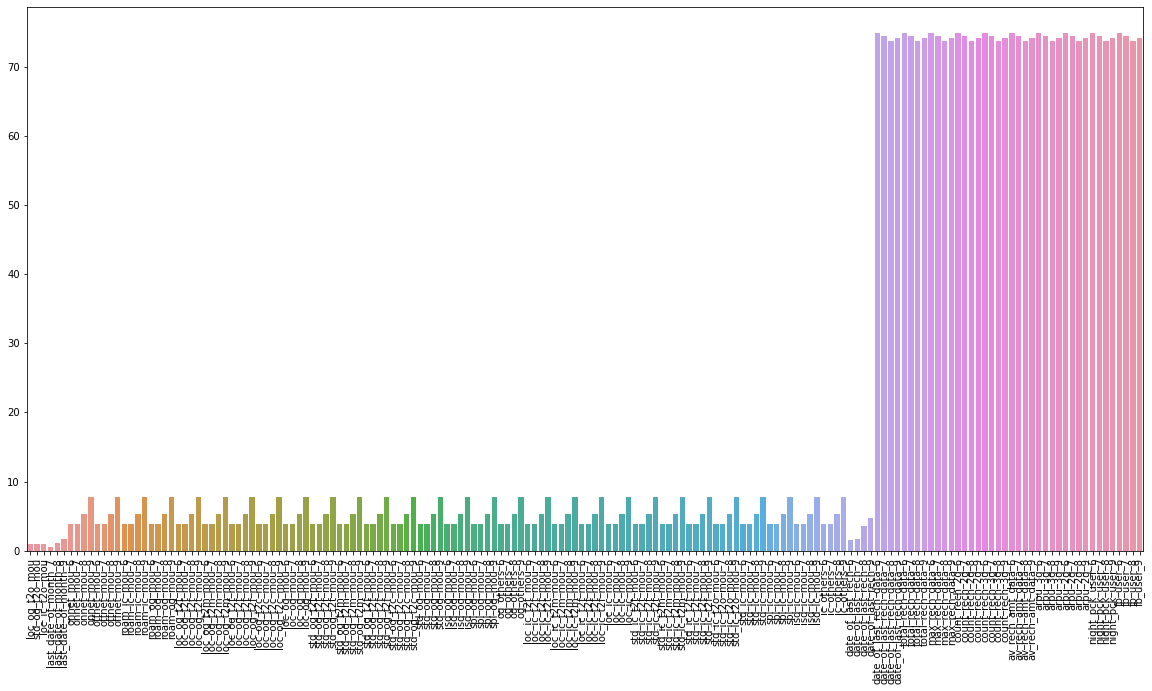

In [10]:
app_nulls_0 = data_nulls[data_nulls.values>0]
plt.figure(figsize=(20,10))
sns.barplot(x=app_nulls_0.index,y=app_nulls_0.values)
plt.xticks(rotation=90)
plt.show()

### Check Duplicates

In [11]:
data = data.drop_duplicates(subset=None)
data.shape

(99999, 226)

### Divide the columns in meaningful categories

In [12]:
date_cols = ['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9',
'date_of_last_rech_data_6','date_of_last_rech_data_7','date_of_last_rech_data_8','date_of_last_rech_data_9',
'date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']

id_cols = ['mobile_number','circle_id']

fb_users =  ['fb_user_6','fb_user_7','fb_user_8','fb_user_9']

night_pck_users= ['night_pck_user_6','night_pck_user_7','night_pck_user_8','night_pck_user_9']

recharge_cols = ['total_rech_amt_6','max_rech_amt_6','total_rech_data_6','av_rech_amt_data_6',
'total_rech_amt_7','max_rech_amt_7','total_rech_data_7','av_rech_amt_data_7','total_rech_amt_8','max_rech_amt_8',
'total_rech_data_8','av_rech_amt_data_8','total_rech_amt_9','max_rech_amt_9','total_rech_data_9','av_rech_amt_data_9']

### Drop unwanted Columns and impute where necessary

In [13]:
#impute recharge_cols with 0
data[recharge_cols] = data[recharge_cols].fillna(0) 
#drop date_cols
data = data.drop(date_cols,axis=1)
#drop fb_users
data = data.drop(fb_users,axis=1)
#impute night_pck_users with 0
data[night_pck_users] = data[night_pck_users].fillna(0) 
#drop id cols
data = data.drop(id_cols,axis=1)


### Drop the columns where nulls are greater than 70%

In [14]:
#Get the columns with nulls greater than 40%
data_nulls = data.isnull().sum()/len(data)*100
data_nulls_70 = data_nulls[data_nulls.values>70].index.to_list()
data.drop(data_nulls_70,axis=1,inplace=True)

In [15]:
data.shape

(99999, 188)

### Check the nulls after dropping high null precentage

In [16]:
(data.isnull().sum()/len(data)*100).sort_values(ascending=False)

loc_ic_mou_9          7.745077
loc_og_t2t_mou_9      7.745077
loc_og_t2f_mou_9      7.745077
loc_og_t2c_mou_9      7.745077
loc_og_mou_9          7.745077
std_og_t2t_mou_9      7.745077
std_og_t2m_mou_9      7.745077
std_og_t2f_mou_9      7.745077
std_og_mou_9          7.745077
isd_og_mou_9          7.745077
spl_og_mou_9          7.745077
og_others_9           7.745077
spl_ic_mou_9          7.745077
loc_ic_t2t_mou_9      7.745077
loc_ic_t2m_mou_9      7.745077
loc_ic_t2f_mou_9      7.745077
std_ic_t2t_mou_9      7.745077
std_ic_t2m_mou_9      7.745077
std_ic_t2f_mou_9      7.745077
std_ic_t2o_mou_9      7.745077
std_ic_mou_9          7.745077
loc_og_t2m_mou_9      7.745077
std_og_t2c_mou_9      7.745077
isd_ic_mou_9          7.745077
roam_og_mou_9         7.745077
ic_others_9           7.745077
onnet_mou_9           7.745077
roam_ic_mou_9         7.745077
offnet_mou_9          7.745077
std_og_t2c_mou_8      5.378054
og_others_8           5.378054
std_og_t2m_mou_8      5.378054
spl_ic_m

### Impute remaining data with 0

In [17]:
#impute missing values by 0
data = data.fillna(0) 

### Drop the columns with all 0

In [18]:
zero_column = [col for col in data.columns if (data[col] == 0).all()]
data = data.drop(zero_column,axis=1)
data.shape

(99999, 177)

### Create new features based on the existing ones

#### total recharge amount can be calculated by adding up total amount for recharge and total spent on data recharge
total_rech_amt_6 + total_rech_data_6 * av_rech_amt_data_6

In [19]:
data['total_data_rech_amt_6'] = data['total_rech_data_6'] * data['av_rech_amt_data_6']
data['total_data_rech_amt_7'] = data['total_rech_data_7'] * data['av_rech_amt_data_7']
data['total_data_rech_amt_8'] = data['total_rech_data_8'] * data['av_rech_amt_data_8']
data['total_data_rech_amt_9'] = data['total_rech_data_9'] * data['av_rech_amt_data_9']

In [20]:
data['total_rech_6'] = data['total_data_rech_amt_6'] + data['total_rech_amt_6']
data['total_rech_7'] = data['total_data_rech_amt_7'] + data['total_rech_amt_7']
data['total_rech_8'] = data['total_data_rech_amt_8'] + data['total_rech_amt_8']
data['total_rech_9'] = data['total_data_rech_amt_9'] + data['total_rech_amt_9']
data.head(10)

,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_data_rech_amt_9,total_rech_6,total_rech_7,total_rech_8,total_rech_9
0,197.385,214.816,213.803,21.100,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,0.00,4.13,0.00,0.00,0.00,1.15,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,6,362,252,252,0,252,252,252,0,252,252,252,0,1.0,1.0,1.0,0.0,252.0,252.0,252.0,0.0,30.13,1.32,5.75,0.0,83.57,150.76,109.61,0.00,0.0,0.0,0.0,0.0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,0.0,614.0,504.0,504.0,0.0
1,34.047,355.074,268.321,86.285,24.11,78.68,7.68,18.34,15.74,99.84,304.76,53.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.88,74.56,7.68,18.34,11.51,75.94,291.86,53.76,0.00,0.00,0.00,0.00,0.00,2.91,0.00,0.00,35.39,150.51,299.54,72.11,0.23,4.11,0.00,0.00,0.00,0.46,0.13,0.00,0.00,0.00,0.00,0.00,0.23,4.58,0.13,0.00,0.0,0.00,0.00,0.0,4.68,23.43,12.76,0.00,0.00,0.0,0.0,0.00,40.31,178.53,312.44,72.11,1.61,29.91,2

In [21]:
# Average recharge amount for June + July
data['total_rech_6_7'] = round((data['total_rech_6']+ data['total_rech_7'])/2,2)

In [22]:
#check for value of 70th percentile of the average recharge amount in the first two months
data.total_rech_6_7.quantile(0.7)

478.0

In [23]:
# Number of users falling under the category of high value category
data = data[(data['total_rech_6_7']>=data['total_rech_6_7'].quantile(0.7))]

#### Calculate the Target Churn variable

In [24]:
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
data['churn_prob'] = data.index.isin(data[(data.total_ic_mou_9!=0)| (data.total_og_mou_9!=0)|(data.vol_2g_mb_9!=0)|(data.vol_3g_mb_9!=0)].index)
data['churn_prob'] = data['churn_prob'].apply(lambda x: 1 if x==False else 0)
churn_col=['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9','churn_prob']
data[churn_col].head(100)

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9,churn_prob
0,0.00,0.00,0.00,0.00,1
7,0.00,0.00,0.00,0.00,1
8,34.91,142.18,0.00,0.00,0
21,252.61,1031.53,0.00,0.00,0
23,127.48,127.63,13.93,314.74,0
33,114.16,1.70,30.92,5588.11,0
38,114.09,708.04,0.00,0.00,0
41,165.84,89.13,0.00,0.00,0
48,894.81,2319.01,0.00,0.00,0
53,680.61,503.06,0.82,0.00,0


#### Drop the colums for the 9th month

In [25]:
attributes_9 = [col for col in data.columns if '_9' in col]
data = data.drop(attributes_9,axis=1)
data.shape

(30001, 142)

#### Check the data distribution of Churned and Not-Churned uses

In [26]:
print(len(data[data.churn_prob==1]))
print(len(data[data.churn_prob==0]))

2441
27560


#### Drop unwanted variables

In [27]:
data = data.drop(columns=['onnet_mou_6', 'onnet_mou_7', 'onnet_mou_8', 'offnet_mou_6', 'offnet_mou_7', 'offnet_mou_8'])

In [28]:
data['roam_any_6'] = data[['roam_ic_mou_6', 'roam_og_mou_6']].sum(axis = 1)
data['roam_any_7'] = data[['roam_ic_mou_7', 'roam_og_mou_7']].sum(axis = 1)
data['roam_any_8'] = data[['roam_ic_mou_8', 'roam_og_mou_8']].sum(axis = 1)
data.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0.00,0.00,0.0
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,39.97,46.08,69.7
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0

In [29]:
data['roam_any_6'] = data['roam_any_6'].apply(lambda x: 1 if (x>0) else 0)
data['roam_any_7'] = data['roam_any_7'].apply(lambda x: 1 if (x>0) else 0)
data['roam_any_8'] = data['roam_any_8'].apply(lambda x: 1 if (x>0) else 0)
data.head()

,arpu_6,arpu_7,arpu_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,0
7,1069.180,1349.850,3171.480,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1,1,1
8,378.721,492.223,137.362,0.00,0.00,0.00,0.00,0.00,0.00,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,

In [30]:
data = data.drop(columns=['roam_ic_mou_6', 'roam_ic_mou_7', 'roam_ic_mou_8', 'roam_og_mou_6', 'roam_og_mou_7', 'roam_og_mou_8'])
data.head()

,arpu_6,arpu_7,arpu_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.16,0.00,0.00,4.13,0.00,0.00,1.15,0.00,0.00,5.44,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,0
7,1069.180,1349.850,3171.480,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.00,422.16,533.91,255.79,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1,1,1
8,378.721,492.223,137.362,297.13,217.59,12.49,80.96,70.58,50.54,0.00,0.00,0.00,0.0,0.0,7.15,378.09,288.18,63.04,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,23.84,9.84,0.31,57.58,13.98,15.48,0.00,0.00,0.00,81.43,23.83,15.79,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0,0,0,0
21,514.453,597.753,637.760,4.48,6.16,23.34,91.81,87.93,104.81,0.75,0.00,1.58,0.0,0.0,0.00,97.04

#### Merge local outgoing calls to single variable

In [31]:
## Add all local ic and og columns and add a new column which says if local value is true for data
data['local_any_6'] = data[['loc_og_t2t_mou_6', 'loc_og_t2m_mou_6', 'loc_og_t2f_mou_6', 'loc_og_t2c_mou_6', 'loc_og_mou_6', 'loc_ic_t2t_mou_6', 'loc_ic_t2m_mou_6', 'loc_ic_t2f_mou_6', 'loc_ic_mou_6']].sum(axis=1)
data['local_any_7'] = data[['loc_og_t2t_mou_7', 'loc_og_t2m_mou_7', 'loc_og_t2f_mou_7', 'loc_og_t2c_mou_7', 'loc_og_mou_7', 'loc_ic_t2t_mou_7', 'loc_ic_t2m_mou_7', 'loc_ic_t2f_mou_7', 'loc_ic_mou_7']].sum(axis=1)
data['local_any_8'] = data[['loc_og_t2t_mou_8', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_8', 'loc_og_mou_8', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_8', 'loc_ic_mou_8']].sum(axis=1)
data['local_any_6'] = data['local_any_6'].apply(lambda x: 1 if (x > 0) else 0)
data['local_any_7'] = data['local_any_7'].apply(lambda x: 1 if (x > 0) else 0)
data['local_any_8'] = data['local_any_8'].apply(lambda x: 1 if (x > 0) else 0)
data = data.drop(columns=['loc_og_t2t_mou_6', 'loc_og_t2t_mou_7', 'loc_og_t2t_mou_8', 'loc_og_t2m_mou_6', 'loc_og_t2m_mou_7', 'loc_og_t2m_mou_8', 'loc_og_t2f_mou_6', 'loc_og_t2f_mou_7', 'loc_og_t2f_mou_8', 'loc_og_t2c_mou_6', 'loc_og_t2c_mou_7', 'loc_og_t2c_mou_8', 'loc_og_mou_6', 'loc_og_mou_7', 'loc_og_mou_8', 'loc_ic_t2t_mou_6', 'loc_ic_t2t_mou_7', 'loc_ic_t2t_mou_8', 'loc_ic_t2m_mou_6', 'loc_ic_t2m_mou_7', 'loc_ic_t2m_mou_8', 'loc_ic_t2f_mou_6', 'loc_ic_t2f_mou_7', 'loc_ic_t2f_mou_8', 'loc_ic_mou_6', 'loc_ic_mou_7', 'loc_ic_mou_8'])
data.head()

,arpu_6,arpu_7,arpu_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,0,0,0,1
7,1069.180,1349.850,3171.480,4.30,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,60.86,75.14,77.84,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1,1,1,1,1,1
8,378.721,492.223,137.362,116.56,133.43,22.58,13.69,10.04,75.69,0.00,0.00,0.00,130.26,143.48,98.28,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,0.00,0.58,0.10,22.43,4.08,0.65,0.00,0.00,0.00,22.43,4.66,0.75,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0,0,0,0,1,1,1
21,514.453,597.753,637.760,97.93,125.94,61.79,665.36,808.74,876.99,0.00,0.00,0.00,763.29,934.69,938.79,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,14.06,5.98,0.18,67.69,38.23,101.74,0.00,0.00,0.00,81.76,44.21,101.93,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0,0,0,0,1,1,1
23,74.350,193.897,366.966,0.00,0.00,0.00,2.36,6.35,39.61,0.00,0.00,0.00,2.36,6.35,39.61,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,0.51,0.00,13.38,2.43,14.89,43.91,0.00,0.00,0.00,2.94,14.89,57.29,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.0

#### merge outgoing std calls to single variable

In [32]:
## Add all std ic and og columns and add a new column which says if std value is true for data
data['std_any_6'] = data[['std_og_t2t_mou_6', 'std_og_t2m_mou_6', 'std_og_t2f_mou_6', 'std_og_mou_6', 'std_ic_t2t_mou_6', 'std_ic_t2m_mou_6', 'std_ic_t2f_mou_6', 'std_ic_mou_6']].sum(axis=1)
data['std_any_7'] = data[['std_og_t2t_mou_7', 'std_og_t2m_mou_7', 'std_og_t2f_mou_7', 'std_og_mou_7', 'std_ic_t2t_mou_7', 'std_ic_t2m_mou_7', 'std_ic_t2f_mou_7', 'std_ic_mou_7']].sum(axis=1)
data['std_any_8'] = data[['std_og_t2t_mou_8', 'std_og_t2m_mou_8', 'std_og_t2f_mou_8', 'std_og_mou_8', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_8', 'std_ic_mou_8']].sum(axis=1)

data['std_any_6'] = data['std_any_6'].apply(lambda x: 1 if (x > 0) else 0)
data['std_any_7'] = data['std_any_7'].apply(lambda x: 1 if (x > 0) else 0)
data['std_any_8'] = data['std_any_8'].apply(lambda x: 1 if (x > 0) else 0)
data = data.drop(columns=['std_og_t2t_mou_6', 'std_og_t2t_mou_7', 'std_og_t2t_mou_8', 'std_og_t2m_mou_6', 'std_og_t2m_mou_7', 'std_og_t2m_mou_8', 'std_og_t2f_mou_6', 'std_og_t2f_mou_7', 'std_og_t2f_mou_8', 'std_og_mou_6', 'std_og_mou_7', 'std_og_mou_8', 'std_ic_t2t_mou_6', 'std_ic_t2t_mou_7', 'std_ic_t2t_mou_8', 'std_ic_t2m_mou_6', 'std_ic_t2m_mou_7', 'std_ic_t2m_mou_8', 'std_ic_t2f_mou_6', 'std_ic_t2f_mou_7', 'std_ic_t2f_mou_8', 'std_ic_mou_6', 'std_ic_mou_7', 'std_ic_mou_8'])
data.head()

,arpu_6,arpu_7,arpu_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8
0,197.385,214.816,213.803,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,5.44,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,0,0,0,1,0,0,0
7,1069.180,1349.850,3171.480,0.0,0.18,10.01,4.5,0.0,6.50,0.0,0.0,0.0,487.53,609.24,350.16,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1,1,1,1,1,1,1,1,1
8,378.721,492.223,137.362,0.0,0.00,0.00,0.0,0.0,10.23,0.0,0.0,0.0,508.36,431.66,171.56,103.86,28.49,16.54,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0,0,0,0,1,1,1,1,1,1
21,514.453,597.753,637.760,0.0,0.00,0.00,0.0,0.0,0.00,0.0,0.0,0.0,860.34,1028.79,1068.54,207.09,131.89,261.04,0.00,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0,0,0,0,1,1,1,1,1,1
23,74.350,193.897,366.966,0.0,0.01,0.00,0.1,0.0,17.71,0.0,0.0,0.0,134.38,140.04,239.48,119.58,222.89,298.33,0.00,0.0,0.0,0.00,28.23,3.74,0.00,5.35,13.06,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,0,0,0,0,1,1,1,1,1,1


#### Merge outgoing isd calls to single variable

In [33]:
## Add all isd & spl ic and og columns and add a new column which says if spl value is true for data
data['spl_any_6'] = data[['isd_og_mou_6', 'spl_og_mou_6', 'og_others_6', 'spl_ic_mou_6', 'isd_ic_mou_6', 'ic_others_6']].sum(axis=1)
data['spl_any_7'] = data[['isd_og_mou_7', 'spl_og_mou_7', 'og_others_7', 'spl_ic_mou_7', 'isd_ic_mou_7', 'ic_others_7']].sum(axis=1)
data['spl_any_8'] = data[['isd_og_mou_8', 'spl_og_mou_8', 'og_others_8', 'spl_ic_mou_8', 'isd_ic_mou_8', 'ic_others_8']].sum(axis=1)

data['spl_any_6'] = data['spl_any_6'].apply(lambda x: 1 if (x > 0) else 0)
data['spl_any_7'] = data['spl_any_7'].apply(lambda x: 1 if (x > 0) else 0)
data['spl_any_8'] = data['spl_any_8'].apply(lambda x: 1 if (x > 0) else 0)

data = data.drop(columns=['isd_og_mou_6', 'isd_og_mou_7', 'isd_og_mou_8', 'spl_og_mou_6', 'spl_og_mou_7', 'spl_og_mou_8', 'og_others_6', 'og_others_7', 'og_others_8',  'spl_ic_mou_6', 'spl_ic_mou_7', 'spl_ic_mou_8', 'isd_ic_mou_6', 'isd_ic_mou_7', 'isd_ic_mou_8', 'ic_others_6', 'ic_others_7', 'ic_others_8'])
data.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1,1,1,1,1,1,1,1,1,1,1,1
8,378.721,492.223,137.362,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,90,154,30,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0,0,0,0,1,1,1,1,1,1,0,0,1
21,514.453,597.753,637.760,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,50,50,50,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0,0,0,0,1,1,1,1,1,1,0,0,0
23,74.350,193.897,366.966,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,179,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,0,0,0,0,1,1,1,1,1,1,1,1,1


#### remove max column as we already have total recharge column 

In [34]:

data = data.drop(columns=['max_rech_amt_6', 'max_rech_amt_7', 'max_rech_amt_8'])
data.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,total_rech_data_6,total_rech_data_7,total_rech_data_8,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_data_rech_amt_6,total_data_rech_amt_7,total_data_rech_amt_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,1.0,1.0,1.0,252.0,252.0,252.0,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,252.0,252.0,252.0,614.0,504.0,504.0,559.0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,0,0,779,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,0.0,0.0,0.0,1580.0,790.0,3638.0,1185.0,1,1,1,1,1,1,1,1,1,1,1,1,1
8,378.721,492.223,137.362,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,50,0,10,0.0,2.0,3.0,0.0,177.0,69.0,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,0.0,354.0,207.0,437.0,955.0,327.0,696.0,0,0,0,0,1,1,1,1,1,1,0,0,1
21,514.453,597.753,637.760,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,30,20,50,0.0,0.0,0.0,0.0,0.0,0.0,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,0.0,0.0,0.0,600.0,680.0,718.0,640.0,0,0,0,0,1,1,1,1,1,1,0,0,0
23,74.350,193.897,366.966,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,0,0.0,2.0,2.0,0.0,356.0,270.0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.00,0.0,712.0,540.0,0.0,1166.0,979.0,583.0,0,0,0,0,1,1,1,1,1,1,1,1,1


In [35]:
## Removing 'total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8'
## Calculation for above column is added as 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8', 

data = data.drop(columns=['total_rech_data_6', 'total_rech_data_7', 'total_rech_data_8', 'av_rech_amt_data_6', 'av_rech_amt_data_7', 'av_rech_amt_data_8', 'total_data_rech_amt_6', 'total_data_rech_amt_7', 'total_data_rech_amt_8'])
data.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,614.0,504.0,504.0,559.0,1,0,0,0,0,0,1,0,0,0,0,0,0
7,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,1580.0,790.0,3638.0,1185.0,1,1,1,1,1,1,1,1,1,1,1,1,1
8,378.721,492.223,137.362,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,50,0,10,0.00,356.00,0.03,0.00,750.95,11.94,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,21.03,910.65,122.16,0.00,437.0,955.0,327.0,696.0,0,0,0,0,1,1,1,1,1,1,0,0,1
21,514.453,597.753,637.760,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,30,20,50,0.00,0.00,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,0.00,0.00,0.00,0.00,600.0,680.0,718.0,640.0,0,0,0,0,1,1,1,1,1,1,0,0,0
23,74.350,193.897,366.966,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,0,0.00,0.48,0.01,0.00,599.09,1009.92,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,604,40.45,51.86,0.00,0.00,0.0,1166.0,979.0,583.0,0,0,0,0,1,1,1,1,1,1,1,1,1


#### Merge data usage for single column

In [36]:
## Data used 2g and 3g
data['data_used_6'] = data[['vol_2g_mb_6', 'vol_3g_mb_6', 'jun_vbc_3g']].sum(axis=1)
data['data_used_7'] = data[['vol_2g_mb_7', 'vol_3g_mb_7', 'jul_vbc_3g']].sum(axis=1)
data['data_used_8'] = data[['vol_2g_mb_8', 'vol_3g_mb_8', 'aug_vbc_3g']].sum(axis=1)
data = data.drop(columns=['vol_2g_mb_6', 'vol_2g_mb_7', 'vol_2g_mb_8', 'vol_3g_mb_6', 'vol_3g_mb_7', 'vol_3g_mb_8', 'aug_vbc_3g', 'jul_vbc_3g', 'jun_vbc_3g', 'sep_vbc_3g'])
data.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,5.44,4,3,2,362,252,252,252,252,252,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,614.0,504.0,504.0,559.0,1,0,0,0,0,0,1,0,0,0,0,0,0,214.90,152.08,145.76
7,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,558.04,428.74,5,5,7,1580,790,3638,0,0,779,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,1580.0,790.0,3638.0,1185.0,1,1,1,1,1,1,1,1,1,1,1,1,1,18.74,19.38,57.74
8,378.721,492.223,137.362,508.36,431.66,171.56,103.86,28.49,16.54,19,21,14,437,601,120,50,0,10,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,437.0,955.0,327.0,696.0,0,0,0,0,1,1,1,1,1,1,0,0,1,122.16,2017.60,33.00
21,514.453,597.753,637.760,860.34,1028.79,1068.54,207.09,131.89,261.04,22,26,27,600,680,718,30,20,50,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,600.0,680.0,718.0,640.0,0,0,0,0,1,1,1,1,1,1,0,0,0,0.00,0.00,0.00
23,74.350,193.897,366.966,134.38,140.04,239.48,119.58,222.89,298.33,3,5,4,0,454,439,0,179,0,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,604,0.0,1166.0,979.0,583.0,0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,651.43,1050.38


#### drop unwanted recharge columns

In [37]:
## Removing column 'total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'
data = data.drop(columns=['total_rech_num_6', 'total_rech_num_7', 'total_rech_num_8', 'total_rech_amt_6', 'total_rech_amt_7', 'total_rech_amt_8'])
data.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
0,197.385,214.816,213.803,0.00,0.00,0.00,0.00,0.00,5.44,252,252,252,0.0,0.0,0.0,0,0,0,0,0,0,1,1,1,0,0,0,968,614.0,504.0,504.0,559.0,1,0,0,0,0,0,1,0,0,0,0,0,0,214.90,152.08,145.76
7,1069.180,1349.850,3171.480,487.53,609.24,350.16,626.46,558.04,428.74,0,0,779,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,802,1580.0,790.0,3638.0,1185.0,1,1,1,1,1,1,1,1,1,1,1,1,1,18.74,19.38,57.74
8,378.721,492.223,137.362,508.36,431.66,171.56,103.86,28.49,16.54,50,0,10,0.0,0.0,0.0,0,1,0,0,1,3,0,0,0,0,0,0,315,437.0,955.0,327.0,696.0,0,0,0,0,1,1,1,1,1,1,0,0,1,122.16,2017.60,33.00
21,514.453,597.753,637.760,860.34,1028.79,1068.54,207.09,131.89,261.04,30,20,50,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,720,600.0,680.0,718.0,640.0,0,0,0,0,1,1,1,1,1,1,0,0,0,0.00,0.00,0.00
23,74.350,193.897,366.966,134.38,140.04,239.48,119.58,222.89,298.33,0,179,0,0.0,0.0,0.0,0,0,0,0,0,0,0,2,1,0,0,1,604,0.0,1166.0,979.0,583.0,0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,651.43,1050.38


## EDA

In [38]:
data.corr()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,churn_prob,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8
arpu_6,1.000000,0.671732,0.612617,0.554510,0.363276,0.301856,0.225987,0.169024,0.150749,0.266656,0.207282,0.199304,0.014224,-0.004902,0.009762,-0.039073,-0.084189,-0.061430,-0.158359,-0.193927,-0.152069,0.176436,0.081091,0.103661,-0.002555,-0.025233,-0.017509,0.041451,0.419558,0.210705,0.207462,0.368357,0.067624,0.063804,0.101552,0.113572,0.090517,-0.014049,-0.043687,0.185237,0.126740,0.083984,0.125689,0.051392,0.039966,0.130866,0.043459,0.061747
arpu_7,0.671732,1.000000,0.759858,0.365323,0.535818,0.429002,0.139868,0.212497,0.185611,0.246934,0.295925,0.252987,-0.003041,0.008977,0.018854,-0.081001,-0.033341,-0.048411,-0.182733,-0.151254,-0.132150,0.084523,0.190987,0.132849,-0.027247,0.010861,0.000907,0.031506,0.230876,0.419872,0.284664,0.385248,-0.012789,0.096422,0.088014,0.101396,-0.001393,0.096331,0.080446,0.120771,0.187280,0.164465,0.048272,0.120475,0.105812,0.044389,0.134290,0.101379
arpu_8,0.612617,0.759858,1.000000,0.275700,0.401973,0.562003,0.141950,0.193659,0.253828,0.218966,0.298866,0.320749,-0.006005,0.004413,0.028833,-0.052858,-0.038764,0.013646,-0.153195,-0.137166,-0.074554,0.089555,0.123491,0.224166,-0.022256,-0.002160,0.045430,0.070789,0.215351,0.296103,0.440914,0.301961,-0.160911,0.094485,0.039718,0.057175,0.002586,0.075221,0.198624,0.107360,0.155510,0.243436,0.039825,0.084245,0.182975,0.060035,0.087420,0.184780
total_og_mou_6,0.554510,0.365323,0.275700,1.000000,0.713037,0.564085,0.177640,0.116627,0.086519,0.071973,0.049083,0.030956,-0.013295,-0.014572,0.001154,-0.136421,-0.147735,-0.128192,-0.187310,-0.194763,-0.157216,-0.114282,-0.119527,-0.101363,-0.081087,-0.078913,-0.067913,-0.031220,0.070428,-0.015221,-0.008331,0.031447,0.078321,-0.049703,0.074629,0.115412,0.171425,0.086333,-0.023238,0.280125,0.230770,0.148042,0.160015,0.088454,0.053113,-0.184808,-0.199740,-0.174610
total_og_mou_7,0.363276,0.535818,0.401973,0.713037,1.000000,0.775550,0.080573,0.160103,0.122734,0.058700,0.092642,0.062538,-0.019352,-0.005784,0.016991,-0.143886,-0.141521,-0.124394,-0.199307,-0.180069,-0.147450,-0.126535,-0.114064,-0.101754,-0.087766,-0.080687,-0.064224,-0.043002,-0.004672,0.052746,0.034084,0.028989,-0.000356,0.083389,0.002150,0.070498,0.065825,0.165279,0.105022,0.217564,0.286190,0.241965,0.067588,0.149442,0.124237,-0.200521,-0.197307,-0.170838
total_og_mou_8,0.301856,0.429002,0.562003,0.564085,0.775550,1.000000,0.081338,0.138272,0.203841,0.061155,0.104546,0.124246,-0.014316,-0.005534,0.026612,-0.117345,-0.108345,-0.089749,-0.169963,-0.153054,-0.110729,-0.100928,-0.087109,-0.064037,-0.072252,-0.062000,-0.042457,-0.003933,-0.001525,0.048681,0.122876,0.028361,-0.145441,0.105053,-0.002211,-0.039207,0.037933,0.125060,0.215663,0.178068,0.236695,0.306485,0.045091,0.109024,0.202046,-0.158261,-0.152611,-0.118141
total_ic_mou_6,0.225987,0.139868,0.141950,0.177640,0.080573,0.081338,1.000000,0.803042,0.709168,0.077809,0.073624,0.093028,-0.014508,-0.023458,-0.021543,0.031816,0.015455,0.027209,-0.078148,-0.095636,-0.071802,0.004362,0.001499,0.019267,-0.033075,-0.041176,-0.032536,0.152307,0.040774,-0.005765,0.014819,0.020036,-0.047631,-0.074352,-0.024839,-0.007762,0.155520,0.104875,0.081692,0.162079,0.130699,0.119528,0.144225,0.087983,0.095153,-0.010690,-0.023632,-0.007096
total_ic_mou_7,0.169024,0.212497,0.193659,0.116627,0.160103,0.138272,0.803042,1.000000,0.820529,0.075394,0.098400,0.107068,-0.020407,-0.018266,-0.013033,0.025383,0.022519,0.033285

In [39]:
data['term'] = (data['aon']/30).round(0)
data.drop('aon',axis=1, inplace=True)


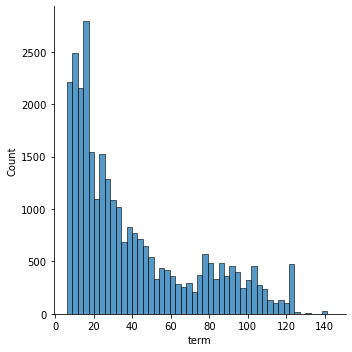

In [40]:
sns.displot(data.term)

In [41]:
trange = [0, 6, 12, 24, 60, 61]
label = [ '0-6 Months', '6-12 Months', '1-2 Yrs', '2-5 Yrs', '5 Yrs and above']
data['term_range'] = pd.cut(data['term'], trange, labels=label)
data['term_range'].head()

0         2-5 Yrs
7         2-5 Yrs
8     6-12 Months
21        1-2 Yrs
23        1-2 Yrs
Name: term_range, dtype: category
Categories (5, object): ['0-6 Months' < '6-12 Months' < '1-2 Yrs' < '2-5 Yrs' < '5 Yrs and above']

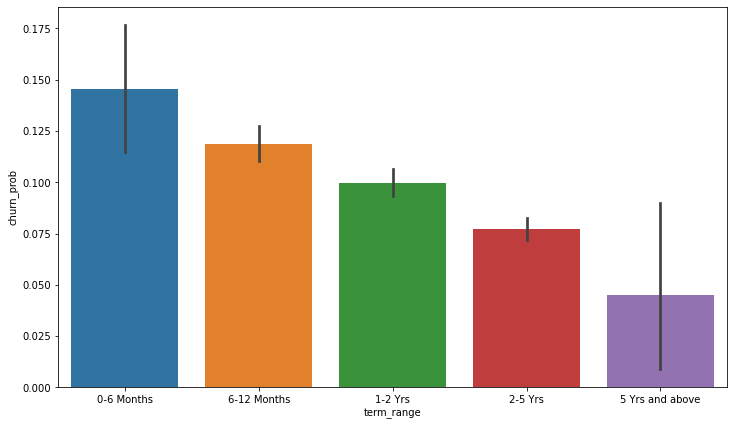

In [42]:
# Plotting a bar plot for tenure range
plt.figure(figsize=[12,7])
sns.barplot(x='term_range',y='churn_prob', data=data)
plt.show()

As the relationship of the customer ages, the probability of churn is decreased. As this is highest in first 6 months

As the number of recharges increase, there is great decline in the churn rate

In [43]:
data.drop('term_range',axis=1, inplace=True)

In [44]:
data_churned = data[data.churn_prob==1]
data_notchurned = data[data.churn_prob==0]

In [45]:
len(data.columns)

48

In [46]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30001 entries, 0 to 99997
Data columns (total 48 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   arpu_6              30001 non-null  float64
 1   arpu_7              30001 non-null  float64
 2   arpu_8              30001 non-null  float64
 3   total_og_mou_6      30001 non-null  float64
 4   total_og_mou_7      30001 non-null  float64
 5   total_og_mou_8      30001 non-null  float64
 6   total_ic_mou_6      30001 non-null  float64
 7   total_ic_mou_7      30001 non-null  float64
 8   total_ic_mou_8      30001 non-null  float64
 9   last_day_rch_amt_6  30001 non-null  int64  
 10  last_day_rch_amt_7  30001 non-null  int64  
 11  last_day_rch_amt_8  30001 non-null  int64  
 12  night_pck_user_6    30001 non-null  float64
 13  night_pck_user_7    30001 non-null  float64
 14  night_pck_user_8    30001 non-null  float64
 15  monthly_2g_6        30001 non-null  int64  
 16  mont

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


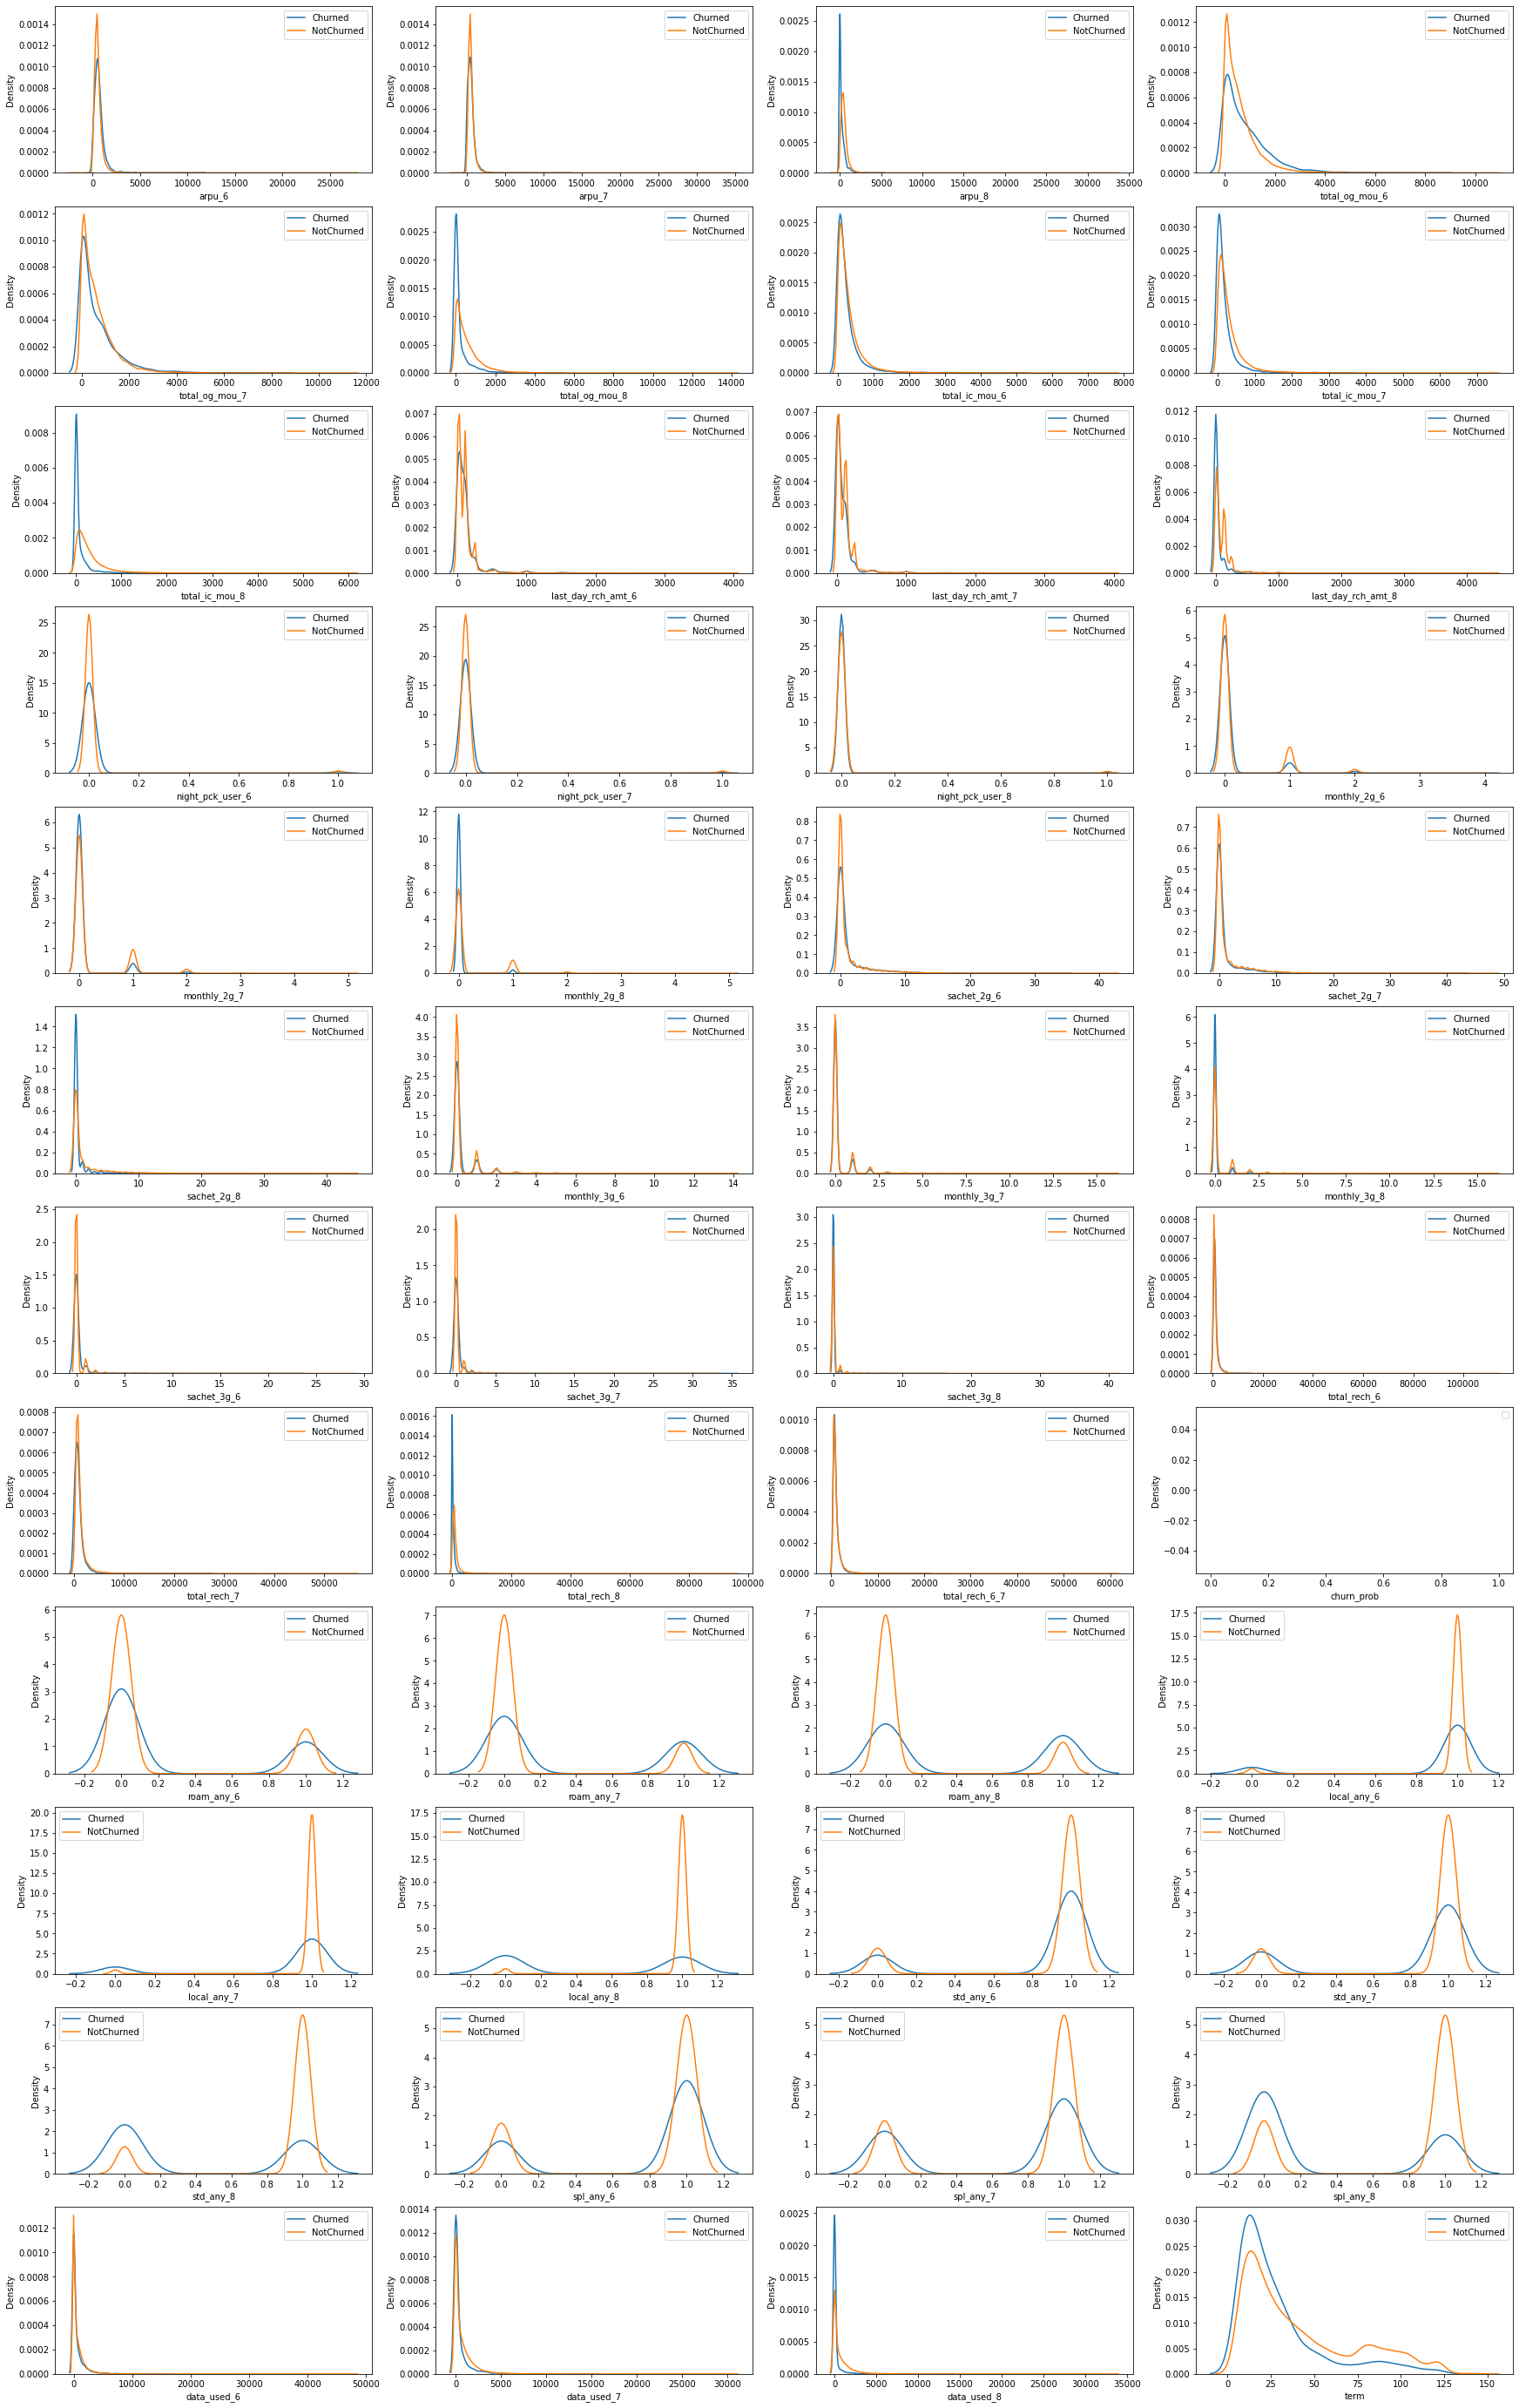

In [47]:
index=1
plt.figure(figsize=(30,50))
for col in data.columns:
    plt.subplot(12,4,index)
    sns.distplot(data_churned[col],label='Churned',hist=False)
    sns.distplot(data_notchurned[col],label='NotChurned',hist=False)
    index+=1
    plt.legend()
plt.show()

## Logistic Regression Model

In [48]:
X = data.drop(['churn_prob'],axis=1)
y= data['churn_prob']

In [49]:
X_train,X_test,y_train,y_test = train_test_split(X,y,train_size=0.7,test_size=0.3,random_state=42)

In [50]:
print(X_train.shape,y_train.shape)
print(X_test.shape,y_test.shape)

(21000, 47) (21000,)
(9001, 47) (9001,)


In [51]:
X_test.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,term
7526,512.626,715.349,893.122,473.68,443.03,360.89,312.41,341.26,246.43,128,50,144,0.0,0.0,0.0,0,1,0,0,0,0,0,0,1,0,0,0,553.0,994.0,1518.0,773.5,0,0,0,1,1,1,1,1,1,1,1,1,244.95,199.61,1935.70,108.0
74907,213.129,221.758,0.000,1.38,9.13,0.00,0.00,0.18,0.00,252,0,0,0.0,0.0,0.0,0,0,0,0,0,0,1,1,0,0,0,0,504.0,574.0,0.0,539.0,0,0,0,0,1,0,0,0,0,1,1,0,164.85,1600.08,12.06,6.0
99617,469.806,266.301,10.900,486.43,2.00,0.00,252.41,9.56,0.00,26,154,0,0.0,0.0,0.0,1,1,0,0,0,0,0,0,0,0,0,0,554.0,554.0,0.0,554.0,1,1,1,1,1,1,1,1,0,0,0,0,788.59,929.43,0.00,43.0
83565,147.711,449.574,346.995,256.36,185.66,230.84,34.68,27.09,43.03,30,30,30,0.0,0.0,0.0,0,2,0,0,0,0,0,0,1,0,0,0,150.0,1236.0,624.0,693.0,1,0,0,1,1,1,0,0,1,0,0,1,0.00,2006.06,2063.42,38.0
8695,564.211,504.151,347.028,39.86,38.18,75.79,120.98,162.54,124.68,152,65,65,0.0,0.0,0.0,0,0,0,2,0,0,1,2,1,1,0,0,2988.0,1677.0,569.0,2332.5,0,0,0,1,1,1,1,1,1,1,0,1,2793.16,3301.58,2284.92,10.0


In [52]:
X_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,term
65002,538.930,642.486,0.000,56.44,84.84,0.00,69.84,77.14,0.00,200,0,0,0.0,0.0,0.0,0,0,0,0,0,0,2,1,0,0,0,0,1814.0,1110.0,0.0,1462.0,0,0,0,1,1,0,1,1,0,0,0,0,3457.74,2525.36,0.0,35.0
67088,459.958,517.270,416.021,1036.46,682.96,267.89,205.93,234.76,206.11,110,65,20,0.0,0.0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,673.0,511.0,464.0,592.0,0,1,1,1,1,1,1,1,1,1,1,1,0.00,0.00,0.0,15.0
36410,356.541,299.857,280.326,329.41,275.39,285.16,105.51,93.54,98.23,67,130,0,0.0,0.0,0.0,0,0,0,2,4,6,0,0,0,0,0,0,442.0,845.0,1118.0,643.5,0,0,0,1,1,1,1,1,1,1,1,1,0.00,0.00,0.0,107.0
90870,565.629,723.523,631.080,1200.48,1413.88,1522.09,128.39,141.24,29.39,110,44,144,0.0,0.0,0.0,0,1,0,0,0,0,0,0,0,0,0,0,666.0,1026.0,734.0,846.0,0,0,0,1,1,1,1,1,1,1,1,1,0.00,1006.93,0.0,16.0
50581,313.014,99.615,169.704,57.34,35.54,47.08,116.56,124.58,147.38,50,10,30,0.0,0.0,0.0,0,0,0,7,5,9,0,0,0,0,0,0,1560.0,740.0,2220.0,1150.0,0,0,0,1,1,1,1,0,0,1,1,1,534.18,266.23,448.8,8.0


#### Scale the numerical columns using MinMaxScaler

In [53]:
scaler = MinMaxScaler()
num_col = X_train.select_dtypes(include = ['int64','float64']).columns.tolist()
X_train[num_col] = scaler.fit_transform(X_train[num_col])
X_train.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,term
65002,0.093286,0.071489,0.010184,0.007429,0.007465,0.000000,0.012619,0.010597,0.000000,0.049875,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.142857,0.0625,0.0,0.0,0.0,0.0,0.015988,0.019795,0.000000,0.016195,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.071927,0.082393,0.000000,0.210145
67088,0.090653,0.068120,0.022460,0.136427,0.060092,0.019076,0.037209,0.032251,0.037096,0.027431,0.016209,0.004495,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.005932,0.009113,0.004839,0.001876,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.065217
36410,0.087205,0.062269,0.018456,0.043360,0.024231,0.020306,0.019064,0.012851,0.017680,0.016708,0.032419,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.058824,0.095238,0.136364,0.000000,0.0000,0.0,0.0,0.0,0.0,0.003896,0.015069,0.011660,0.002724,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.731884
90870,0.094177,0.073670,0.028806,0.158017,0.124403,0.108387,0.023198,0.019404,0.005290,0.027431,0.010973,0.032367,0.0,0.0,0.0,0.0,0.2,0.0,0.000000,0.000000,0.000000,0.000000,0.0000,0.0,0.0,0.0,0.0,0.005870,0.018297,0.007655,0.006057,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.000000,0.032852,0.000000,0.072464
50581,0.085753,0.056880,0.015192,0.007548,0.003127,0.003353,0.021061,0.017115,0.026526,0.012469,0.002494,0.006743,0.0,0.0,0.0,0.0,0.0,0.0,0.205882,0.119048,0.204545,0.000000,0.0000,0.0,0.0,0.0,0.0,0.013750,0.013197,0.023153,0.011060,0.0,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,0.011112,0.008686,0.013411,0.014493


#### Check the data distribution of Churned and Not Churned Users

In [54]:
print(len(data[data.churn_prob==1]))
print(len(data[data.churn_prob==0]))

2441
27560


#### Since there is a class imbalance in the values of Churned and Not-Churned values. we will use the SMOTE for tackling class imbalance issue

In [55]:
smote = SMOTE(random_state=42)
X_train_sm,y_train_sm = smote.fit_resample(X_train,y_train)
print(X_train_sm.shape)
print(y_train_sm.shape)

(38520, 47)
(38520,)


#### Create Logistic Regression Model using the StatsModel library

Running First Training Model

In [56]:
# Logistic regression model
X_train_SM = sm.add_constant(X_train_sm)
lr_model_1 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
lr_res_1 = lr_model_1.fit()
lr_res_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_prob   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38472
Model Family:                Binomial   Df Model:                           47
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -13445.
Date:                Tue, 14 Mar 2023   Deviance:                       26889.
Time:                        12:49:24   Pearson chi2:                 9.09e+06
No. Iterations:                    18   Pseudo R-squ. (CS):             0.4975
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1.384e+05   2.53e+05      0.548      0.584   -3.57e+05    6.34e+05
arpu_6                15.5907      2.402      6.491      0.000      10.883      20.298
arpu_7                27.4589      3.260      8.424      0.000      21.070      33.848
arpu_8               -38.9293      3.296    -11.810      0.000     -45.390     -32.469
total_og_mou_6        -0.1184      0.341     -0.347      0.728      -0.787       0.550
total_og_mou_7         4.1781      0.615      6.791      0.000       2.972       5.384
total_og_mou_8        -9.8887      0.856    -11.553      0.000     -11.566      -8.211
total_ic_mou_6         2.8054      0.556      5.044      0.000       1.715       3.896
total_ic_mou_7        11.3250      0.894     12.667      0.000       9.573      13.077
total_ic_mou_8       -25.6954      0.908    -28.285      0.000     -27.476     -23.915
last_day_rch_amt_6     2.4451      0.530      4.611      0.000       1.406       3.484
last_day_rch_amt_7     2.9111      0.513      5.671      0.000       1.905       3.917
last_day_rch_amt_8   -12.2122      0.740    -16.511      0.000     -13.662     -10.763
night_pck_user_6       0.4355      0.163      2.668      0.008       0.116       0.755
night_pck_user_7      -0.5360      0.204     -2.632      0.008      -0.935      -0.137
night_pck_user_8       0.5500      0.224      2.458      0.014       0.111       0.989
monthly_2g_6          -1.4793      0.247     -5.991      0.000      -1.963      -0.995
monthly_2g_7          -1.4840      0.316     -4.697      0.000      -2.103      -0.865
monthly_2g_8          -7.5848      0.451    -16.810      0.000      -8.469      -6.700
sachet_2g_6            1.5671      0.426      3.677      0.000       0.732       2.402
sachet_2g_7            2.8506      0.539      5.289      0.000       1.794       3.907
sachet_2g_8          -17.5272      0.728    -24.064      0.000     -18.955     -16.100
monthly_3g_6           0.2110      0.788      0.268      0.789      -1.334       1.756
monthly_3g_7          -0.4517      0.914     -0.494      0.621      -2.244       1.340
monthly_3g_8         -18.6099      1.182    -15.742      0.000     -20.927     -16.293
sachet_3g_6            0.7611      0.924      0.823      0.410      -1.051       2.573
sachet_3g_7            5.2874      1.064      4.970      0.000       3.202       7.373
sachet_3g_8          -24.3534      1.996    -12.198      0.000     -28.266     -20.440
total_rech_6       -1.643e+07      3e+07     -0.548      0.584   -7.52e+07    4.24e+07
total_rech_7        -8.12e+06   1.48e+07     -0.548      0.584   -3.72e+07    2.09e+07
total_rech_8          36.4214      3.200     11.381      0.000      30.149      42.694
total_rech_6_7       1.76e+07   3.21e+07      0.548      0.584   -4.54e+07    8.06e+07
roam_any_6             0.1997      0.0

#### Feature Selection Using RFE

In [57]:
logreg = LogisticRegression()
# running RFE with 20 variables as output
rfe = RFE(logreg,  n_features_to_select= 20)             
rfe = rfe.fit(X_train_sm, y_train_sm)

In [58]:
rfe.support_

array([ True,  True,  True, False,  True,  True,  True,  True,  True,
        True, False,  True, False, False, False,  True, False,  True,
       False, False,  True, False, False,  True, False, False,  True,
       False,  True,  True,  True, False, False, False, False, False,
        True, False, False, False, False, False, False, False, False,
        True, False])

In [59]:
rfe_columns=X_train_sm.columns[rfe.support_]
rfe_columns

Index(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_8', 'monthly_2g_6',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'total_rech_7', 'total_rech_8', 'total_rech_6_7', 'local_any_8',
       'data_used_8'],
      dtype='object')

In [60]:
list(zip(X_train_sm.columns, rfe.support_, rfe.ranking_))

[('arpu_6', True, 1),
 ('arpu_7', True, 1),
 ('arpu_8', True, 1),
 ('total_og_mou_6', False, 12),
 ('total_og_mou_7', True, 1),
 ('total_og_mou_8', True, 1),
 ('total_ic_mou_6', True, 1),
 ('total_ic_mou_7', True, 1),
 ('total_ic_mou_8', True, 1),
 ('last_day_rch_amt_6', True, 1),
 ('last_day_rch_amt_7', False, 3),
 ('last_day_rch_amt_8', True, 1),
 ('night_pck_user_6', False, 17),
 ('night_pck_user_7', False, 23),
 ('night_pck_user_8', False, 28),
 ('monthly_2g_6', True, 1),
 ('monthly_2g_7', False, 8),
 ('monthly_2g_8', True, 1),
 ('sachet_2g_6', False, 19),
 ('sachet_2g_7', False, 5),
 ('sachet_2g_8', True, 1),
 ('monthly_3g_6', False, 15),
 ('monthly_3g_7', False, 7),
 ('monthly_3g_8', True, 1),
 ('sachet_3g_6', False, 16),
 ('sachet_3g_7', False, 9),
 ('sachet_3g_8', True, 1),
 ('total_rech_6', False, 14),
 ('total_rech_7', True, 1),
 ('total_rech_8', True, 1),
 ('total_rech_6_7', True, 1),
 ('roam_any_6', False, 22),
 ('roam_any_7', False, 18),
 ('roam_any_8', False, 6),
 ('local

In [61]:
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
lr_model_2 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
lr_res_2 = lr_model_2.fit()
lr_res_2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_prob   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38499
Model Family:                Binomial   Df Model:                           20
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14785.
Date:                Tue, 14 Mar 2023   Deviance:                       29570.
Time:                        12:49:40   Pearson chi2:                 8.51e+10
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4613
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.1118      0.188      5.920      0.000       0.744       1.480
arpu_6                 7.6163      1.728      4.409      0.000       4.230      11.002
arpu_7                18.1344      2.823      6.425      0.000      12.602      23.667
arpu_8               -10.8948      2.684     -4.059      0.000     -16.155      -5.634
total_og_mou_7         7.7115      0.496     15.549      0.000       6.739       8.684
total_og_mou_8       -16.5786      0.767    -21.602      0.000     -18.083     -15.074
total_ic_mou_6         1.5209      0.534      2.850      0.004       0.475       2.567
total_ic_mou_7        12.4013      0.885     14.019      0.000      10.667      14.135
total_ic_mou_8       -30.2575      0.891    -33.947      0.000     -32.004     -28.511
last_day_rch_amt_6     1.7593      0.481      3.656      0.000       0.816       2.702
last_day_rch_amt_8   -13.2258      0.717    -18.434      0.000     -14.632     -11.820
monthly_2g_6          -2.1103      0.206    -10.247      0.000      -2.514      -1.707
monthly_2g_8          -7.5279      0.405    -18.571      0.000      -8.322      -6.733
sachet_2g_8          -13.8828      0.600    -23.147      0.000     -15.058     -12.707
monthly_3g_8         -16.1299      0.957    -16.860      0.000     -18.005     -14.255
sachet_3g_8          -15.4927      1.412    -10.969      0.000     -18.261     -12.724
total_rech_7           5.6019      1.612      3.475      0.001       2.442       8.762
total_rech_8          17.9006      3.536      5.062      0.000      10.969      24.832
total_rech_6_7         2.7903      2.243      1.244      0.213      -1.605       7.186
local_any_8           -2.3859      0.054    -44.178      0.000      -2.492      -2.280
data_used_8           -6.2672      1.027     -6.105      0.000      -8.279      -4.255
======================================================================================
"""

In [62]:
# Getting the predicted values on the train set
y_train_sm_pred = lr_res_2.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.96952189, 0.50499554, 0.14917692, 0.40619018, 0.0564423 ,
       0.90832211, 0.43078166, 0.08066   , 0.11638013, 0.50546305])

#### Creating a dataframe with the actual churn flag and the predicted probabilities

In [63]:
# Creating a dataframe with the actual churn flag and the predicted probabilities
y_train_sm_pred_final = pd.DataFrame({'Churn':y_train_sm.values, 'Churn_Probability':y_train_sm_pred})
y_train_sm_pred_final.head()

,Churn,Churn_Probability
0,1,0.969522
1,0,0.504996
2,0,0.149177
3,0,0.406190
4,0,0.056442


#### Creating new column 'predicted' with 1 if Churn_Prob > 0.5 else 0

In [64]:
y_train_sm_pred_final['churn_predicted'] = y_train_sm_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.5 else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Probability,churn_predicted
0,1,0.969522,1
1,0,0.504996,1
2,0,0.149177,0
3,0,0.406190,0
4,0,0.056442,0


In [65]:
# Confusion matrix 
confusion = confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted )
print(confusion)

[[16554  2706]
 [ 3543 15717]]


In [66]:
# Predicted     not_churn    churn
# Actual
# not_churn        16554      2706
# churn            3543       15717  

In [67]:
accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted)

0.837772585669782

#### Checking VIFs

In [68]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_7,78.86
0,arpu_6,54.75
2,arpu_8,12.54
15,total_rech_7,7.89
6,total_ic_mou_7,6.52
17,total_rech_6_7,5.70
18,local_any_8,5.28
16,total_rech_8,5.13
4,total_og_mou_8,4.60
5,total_ic_mou_6,4.53


There are a few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'arpu_7' has the highest VIF. So let's start by dropping that.

In [69]:
rfe_columns = rfe_columns.drop('arpu_7',1)
rfe_columns

Index(['arpu_6', 'arpu_8', 'total_og_mou_7', 'total_og_mou_8',
       'total_ic_mou_6', 'total_ic_mou_7', 'total_ic_mou_8',
       'last_day_rch_amt_6', 'last_day_rch_amt_8', 'monthly_2g_6',
       'monthly_2g_8', 'sachet_2g_8', 'monthly_3g_8', 'sachet_3g_8',
       'total_rech_7', 'total_rech_8', 'total_rech_6_7', 'local_any_8',
       'data_used_8'],
      dtype='object')

In [70]:
# Let's re-run the model using the selected variables
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
lr_model_3 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
lr_res_3 = lr_model_3.fit()
lr_res_3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_prob   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38500
Model Family:                Binomial   Df Model:                           19
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14807.
Date:                Tue, 14 Mar 2023   Deviance:                       29613.
Time:                        12:49:43   Pearson chi2:                 7.79e+08
No. Iterations:                     8   Pseudo R-squ. (CS):             0.4607
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8190      0.151     12.077      0.000       1.524       2.114
arpu_6                10.4165      1.666      6.252      0.000       7.151      13.682
arpu_8                -2.3668      2.419     -0.978      0.328      -7.109       2.375
total_og_mou_7         9.2815      0.433     21.423      0.000       8.432      10.131
total_og_mou_8       -18.1907      0.740    -24.575      0.000     -19.642     -16.740
total_ic_mou_6         1.1125      0.528      2.108      0.035       0.078       2.147
total_ic_mou_7        13.2041      0.871     15.161      0.000      11.497      14.911
total_ic_mou_8       -30.1626      0.890    -33.893      0.000     -31.907     -28.418
last_day_rch_amt_6     2.0948      0.473      4.433      0.000       1.169       3.021
last_day_rch_amt_8   -13.4501      0.717    -18.751      0.000     -14.856     -12.044
monthly_2g_6          -2.1047      0.206    -10.229      0.000      -2.508      -1.701
monthly_2g_8          -7.6323      0.406    -18.814      0.000      -8.427      -6.837
sachet_2g_8          -14.3485      0.596    -24.067      0.000     -15.517     -13.180
monthly_3g_8         -16.4269      0.957    -17.159      0.000     -18.303     -14.551
sachet_3g_8          -16.6083      1.413    -11.758      0.000     -19.377     -13.840
total_rech_7           9.3211      1.475      6.321      0.000       6.431      12.211
total_rech_8          16.7253      3.529      4.739      0.000       9.808      23.643
total_rech_6_7         0.9637      2.147      0.449      0.654      -3.245       5.173
local_any_8           -2.3807      0.054    -44.145      0.000      -2.486      -2.275
data_used_8           -6.2241      1.028     -6.054      0.000      -8.239      -4.209
======================================================================================
"""

In [71]:
y_train_sm_pred = lr_res_3.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.96423996, 0.51329712, 0.14587012, 0.39726951, 0.05472885,
       0.90922294, 0.43399181, 0.078192  , 0.1105718 , 0.49640204])

In [72]:
y_train_sm_pred_final['churn_predicted'] = y_train_sm_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Churn,Churn_Probability,churn_predicted
0,1,0.969522,1
1,0,0.504996,1
2,0,0.149177,0
3,0,0.406190,0
4,0,0.056442,0


In [73]:
confusion = confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted )
print(confusion)
print(accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted))

[[16554  2706]
 [ 3543 15717]]
0.837772585669782


So overall the accuracy hasn't dropped much.

##### check the VIFs again

In [74]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,arpu_8,10.98
0,arpu_6,8.81
5,total_ic_mou_7,6.27
14,total_rech_7,5.90
15,total_rech_8,5.09
17,local_any_8,5.08
16,total_rech_6_7,4.90
4,total_ic_mou_6,4.39
3,total_og_mou_8,4.37
6,total_ic_mou_8,4.23


There are a still few variables with high VIF. It's best to drop these variables as they aren't helping much with prediction and unnecessarily making the model complex. The variable 'arpu_8' has the highest VIF. So let's drop that too.

In [75]:
rfe_columns = rfe_columns.drop('arpu_8',1)
rfe_columns

Index(['arpu_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'total_rech_7', 'total_rech_8',
       'total_rech_6_7', 'local_any_8', 'data_used_8'],
      dtype='object')

In [76]:
# Let's re-run the model using the selected variables
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
lr_model_4 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
lr_res_4 = lr_model_4.fit()
lr_res_4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                 Generalized Linear Model Regression Results                  
==============================================================================
Dep. Variable:             churn_prob   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38501
Model Family:                Binomial   Df Model:                           18
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14807.
Date:                Tue, 14 Mar 2023   Deviance:                       29614.
Time:                        12:49:45   Pearson chi2:                 1.97e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4607
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8420      0.149     12.354      0.000       1.550       2.134
arpu_6                 9.8435      1.561      6.308      0.000       6.785      12.902
total_og_mou_7         9.3453      0.429     21.797      0.000       8.505      10.186
total_og_mou_8       -18.4480      0.695    -26.553      0.000     -19.810     -17.086
total_ic_mou_6         1.1896      0.522      2.279      0.023       0.166       2.213
total_ic_mou_7        13.1357      0.869     15.122      0.000      11.433      14.838
total_ic_mou_8       -30.2510      0.886    -34.133      0.000     -31.988     -28.514
last_day_rch_amt_6     2.0731      0.472      4.396      0.000       1.149       2.997
last_day_rch_amt_8   -13.5926      0.703    -19.324      0.000     -14.971     -12.214
monthly_2g_6          -2.0939      0.206    -10.187      0.000      -2.497      -1.691
monthly_2g_8          -7.6321      0.406    -18.786      0.000      -8.428      -6.836
sachet_2g_8          -14.1848      0.576    -24.626      0.000     -15.314     -13.056
monthly_3g_8         -16.3507      0.957    -17.077      0.000     -18.227     -14.474
sachet_3g_8          -16.2503      1.367    -11.890      0.000     -18.929     -13.572
total_rech_7           9.1782      1.479      6.208      0.000       6.280      12.076
total_rech_8          14.9327      3.136      4.762      0.000       8.787      21.078
total_rech_6_7         1.1842      2.151      0.551      0.582      -3.031       5.400
local_any_8           -2.3864      0.054    -44.500      0.000      -2.491      -2.281
data_used_8           -6.1918      1.031     -6.005      0.000      -8.213      -4.171
======================================================================================
"""

In [77]:
y_train_sm_pred = lr_res_4.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.96403312, 0.51431172, 0.14660834, 0.39520832, 0.05438558,
       0.90978626, 0.43265396, 0.07826542, 0.11107972, 0.49991512])

In [78]:
y_train_sm_pred_final['churn_predicted'] = y_train_sm_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Churn,Churn_Probability,churn_predicted
0,1,0.969522,1
1,0,0.504996,1
2,0,0.149177,0
3,0,0.406190,0
4,0,0.056442,0


In [79]:
confusion = confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted )
print(confusion)
print(accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted))

[[16554  2706]
 [ 3543 15717]]
0.837772585669782


In [80]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_ic_mou_7,6.26
0,arpu_6,5.86
13,total_rech_7,5.84
16,local_any_8,4.98
15,total_rech_6_7,4.90
3,total_ic_mou_6,4.35
5,total_ic_mou_8,4.19
14,total_rech_8,4.05
1,total_og_mou_7,3.92
2,total_og_mou_8,3.57


removing 'total_rech_6_7' as its p-value is higher than 0.05

In [81]:
rfe_columns = rfe_columns.drop('total_rech_6_7',1)
rfe_columns

Index(['arpu_6', 'total_og_mou_7', 'total_og_mou_8', 'total_ic_mou_6',
       'total_ic_mou_7', 'total_ic_mou_8', 'last_day_rch_amt_6',
       'last_day_rch_amt_8', 'monthly_2g_6', 'monthly_2g_8', 'sachet_2g_8',
       'monthly_3g_8', 'sachet_3g_8', 'total_rech_7', 'total_rech_8',
       'local_any_8', 'data_used_8'],
      dtype='object')

In [82]:
# Let's re-run the model using the selected variables
X_train_SM = sm.add_constant(X_train_sm[rfe_columns])
lr_model_5 = sm.GLM(y_train_sm,X_train_SM, family = sm.families.Binomial())
lr_res_5 = lr_model_5.fit()
print(lr_res_5.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:             churn_prob   No. Observations:                38520
Model:                            GLM   Df Residuals:                    38502
Model Family:                Binomial   Df Model:                           17
Link Function:                  Logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14807.
Date:                Tue, 14 Mar 2023   Deviance:                       29615.
Time:                        12:49:48   Pearson chi2:                 2.12e+09
No. Iterations:                     7   Pseudo R-squ. (CS):             0.4607
Covariance Type:            nonrobust                                         
                         coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                  1.8045      0

pvalues for the columns are now less than permissible value

In [83]:
y_train_sm_pred = lr_res_5.predict(X_train_SM)
y_train_sm_pred = y_train_sm_pred.values.reshape(-1)
y_train_sm_pred[:10]

array([0.9638404 , 0.51414414, 0.14755108, 0.39532759, 0.05429917,
       0.91010052, 0.43250584, 0.07682751, 0.11067294, 0.50027334])

In [84]:
y_train_sm_pred_final['churn_predicted'] = y_train_sm_pred_final.Churn_Probability.map(lambda x: 1 if x > 0.5 else 0)

# Viewing the prediction results
y_train_sm_pred_final.head()

,Churn,Churn_Probability,churn_predicted
0,1,0.969522,1
1,0,0.504996,1
2,0,0.149177,0
3,0,0.406190,0
4,0,0.056442,0


In [85]:
confusion = confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted )
print(confusion)
print(accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted))

[[16554  2706]
 [ 3543 15717]]
0.837772585669782


accuracy for the model has not varied with the exclusion of column.Let us check for the VIF Values

In [86]:
vif = pd.DataFrame()
vif['Features'] = X_train_sm[rfe_columns].columns
vif['VIF'] = [variance_inflation_factor(X_train_sm[rfe_columns].values, i) for i in range(X_train_sm[rfe_columns].shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
4,total_ic_mou_7,6.23
0,arpu_6,5.83
15,local_any_8,4.81
3,total_ic_mou_6,4.33
5,total_ic_mou_8,4.19
14,total_rech_8,4.00
1,total_og_mou_7,3.91
2,total_og_mou_8,3.57
16,data_used_8,2.86
11,monthly_3g_8,2.56


VIF are also within the permissible limits. Lets look at the Metrics beyond simply accuracy

In [87]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [88]:
print("Sensitivity = ",TP / float(TP+FN))
print("Specificity = ",TN / float(TN+FP))
print("False Positive Rate = ",FP/ float(TN+FP))
print ("Precision = ",TP / float(TP+FP))
print ("True Negative Prediction Rate = ",TN / float(TN+ FN))

Sensitivity =  0.8160436137071652
Specificity =  0.8595015576323988
False Positive Rate =  0.14049844236760126
Precision =  0.8531183846279108
True Negative Prediction Rate =  0.8237050306015823


#### Plotting the ROC Curve

In [89]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [90]:
fpr, tpr, thresholds = roc_curve( y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_Probability, drop_intermediate = False )

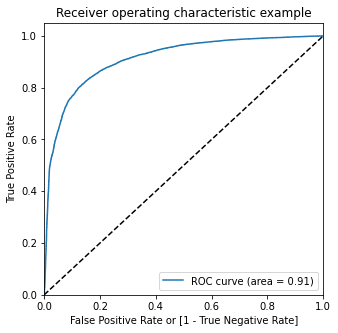

In [91]:
draw_roc(y_train_sm_pred_final.Churn, y_train_sm_pred_final.Churn_Probability)

In [92]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_Probability.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

,Churn,Churn_Probability,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,1,0.969522,1,1,1,1,1,1,1,1,1,1,1
1,0,0.504996,1,1,1,1,1,1,1,0,0,0,0
2,0,0.149177,0,1,1,0,0,0,0,0,0,0,0
3,0,0.406190,0,1,1,1,1,1,0,0,0,0,0
4,0,0.056442,0,1,0,0,0,0,0,0,0,0,0


In [93]:
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

# TP = confusion[1,1] # true positive 
# TN = confusion[0,0] # true negatives
# FP = confusion[0,1] # false positives
# FN = confusion[1,0] # false negatives

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

     probability  accuracy  sensitivity  specificity
0.0          0.0  0.500000     1.000000     0.000000
0.1          0.1  0.674065     0.981256     0.366874
0.2          0.2  0.750052     0.956698     0.543406
0.3          0.3  0.797326     0.921807     0.672845
0.4          0.4  0.827570     0.876116     0.779024
0.5          0.5  0.837773     0.816044     0.859502
0.6          0.6  0.828998     0.741277     0.916719
0.7          0.7  0.797040     0.647767     0.946314
0.8          0.8  0.767627     0.569782     0.965472
0.9          0.9  0.741329     0.504154     0.978505


#### Calculate CutOff

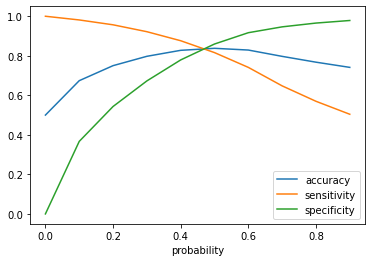

In [94]:
# plotting accuracy sensitivity and specificity for various probabilities calculated above.
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

cuttoff point lies somewhat between 0.4 and 0.5
let's take more points to attain exact value for cutoff

In [95]:
# Let's create columns with refined probability cutoffs 
cutoff_df = pd.DataFrame( columns = ['probability','accuracy','sensitivity','specificity'])

numbers = [0.40,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49]
for i in numbers:
    y_train_sm_pred_final[i]= y_train_sm_pred_final.Churn_Probability.map(lambda x: 1 if x > i else 0)
y_train_sm_pred_final.head()

for i in numbers:
    cm1 = confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      probability  accuracy  sensitivity  specificity
0.40         0.40  0.827570     0.876116     0.779024
0.41         0.41  0.829439     0.870768     0.788110
0.42         0.42  0.831724     0.865784     0.797664
0.43         0.43  0.832555     0.858411     0.806698
0.44         0.44  0.834320     0.852596     0.816044
0.45         0.45  0.835177     0.846158     0.824195
0.46         0.46  0.836267     0.840810     0.831724
0.47         0.47  0.837046     0.835306     0.838785
0.48         0.48  0.837669     0.829024     0.846314
0.49         0.49  0.837980     0.822897     0.853063


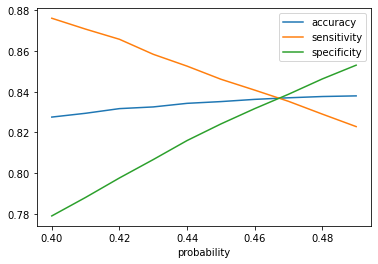

In [96]:
cutoff_df.plot.line(x='probability', y=['accuracy','sensitivity','specificity'])
plt.show()

Cuttoff point comes out at .47

#### Calculate parameters on cutoff Value

In [97]:
#### From the curve above,we can take 0.47 is the optimum point to take it as a cutoff probability.

y_train_sm_pred_final['final_churn_pred'] = y_train_sm_pred_final.Churn_Probability.map( lambda x: 1 if x > 0.47 else 0)

y_train_sm_pred_final.head()

,Churn,Churn_Probability,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,final_churn_pred
0,1,0.969522,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.504996,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0.149177,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.406190,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.056442,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [98]:
# Calculating the ovearall accuracy again
round(accuracy_score(y_train_sm_pred_final.Churn, y_train_sm_pred_final.final_churn_pred),2)

0.84

In [99]:
confusion_2 = confusion_matrix(y_train_sm_pred_final.Churn, y_train_sm_pred_final.final_churn_pred)
print(confusion_2)

[[16155  3105]
 [ 3172 16088]]


In [100]:
TP2 = confusion_2[1,1] # true positive 
TN2 = confusion_2[0,0] # true negatives
FP2 = confusion_2[0,1] # false positives
FN2 = confusion_2[1,0] # false negatives
print("Sensitivity = ",TP2 / float(TP2+FN2))
print("Specificity = ",TN2 / float(TN2+FP2))
print("False Positive Rate = ",FP2/ float(TN2+FP2))
print ("Precision = ",TP2 / float(TP2+FP2))
print ("True Negative Prediction Rate = ",TN2 / float(TN2 + FN2))

Sensitivity =  0.8353063343717549
Specificity =  0.8387850467289719
False Positive Rate =  0.16121495327102803
Precision =  0.8382222685354035
True Negative Prediction Rate =  0.8358772701402184


In [101]:
y_train_sm_pred_final.head()

,Churn,Churn_Probability,churn_predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,0.41,0.42,0.43,0.44,0.45,0.46,0.47,0.48,0.49,final_churn_pred
0,1,0.969522,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
1,0,0.504996,1,1,1,1,1,1,1,0,0,0,0,1,1,1,1,1,1,1,1,1,1
2,0,0.149177,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,0,0.406190,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0.056442,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


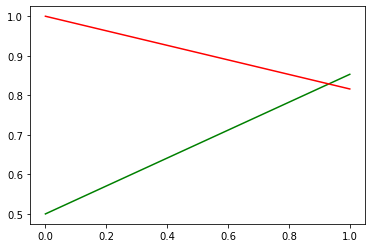

In [102]:
from sklearn.metrics import precision_recall_curve
p, r, thresholds = precision_recall_curve(y_train_sm_pred_final.Churn, y_train_sm_pred_final.churn_predicted)
plt.plot(thresholds, p[:-1], "g-")
plt.plot(thresholds, r[:-1], "r-")
plt.show()

#### Making predictions on the test set


In [103]:
X_test.shape

(9001, 47)

In [104]:
X_test[num_col] = scaler.transform(X_test[num_col])
X_test.head()

,arpu_6,arpu_7,arpu_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,night_pck_user_6,night_pck_user_7,night_pck_user_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,total_rech_6,total_rech_7,total_rech_8,total_rech_6_7,roam_any_6,roam_any_7,roam_any_8,local_any_6,local_any_7,local_any_8,std_any_6,std_any_7,std_any_8,spl_any_6,spl_any_7,spl_any_8,data_used_6,data_used_7,data_used_8,term
7526,0.092409,0.073450,0.036539,0.062349,0.038981,0.025699,0.056448,0.046882,0.044353,0.031920,0.012469,0.032367,0.0,0.0,0.0,0.00,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0625,0.000000,0.0,0.0,0.004874,0.017726,0.015832,0.004864,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.005095,0.006512,0.057843,0.739130
74907,0.082423,0.060167,0.010184,0.000182,0.000803,0.000000,0.000000,0.000025,0.000000,0.062843,0.000000,0.000000,0.0,0.0,0.0,0.00,0.0,0.0,0.000000,0.0,0.0,0.071429,0.0625,0.0000,0.000000,0.0,0.0,0.004442,0.010236,0.000000,0.001004,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.003429,0.052204,0.000360,0.000000
99617,0.090981,0.061366,0.010506,0.064028,0.000176,0.000000,0.045607,0.001313,0.000000,0.006484,0.038404,0.000000,0.0,0.0,0.0,0.25,0.2,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0000,0.000000,0.0,0.0,0.004883,0.009880,0.000000,0.001251,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.016404,0.030324,0.000000,0.268116
83565,0.080241,0.066298,0.020423,0.033744,0.016336,0.016438,0.006266,0.003722,0.007745,0.007481,0.007481,0.006743,0.0,0.0,0.0,0.00,0.4,0.0,0.000000,0.0,0.0,0.000000,0.0000,0.0625,0.000000,0.0,0.0,0.001322,0.022042,0.006508,0.003539,1.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.000000,0.065450,0.061660,0.231884
8695,0.094129,0.067767,0.020424,0.005247,0.003359,0.005397,0.021859,0.022330,0.022440,0.037905,0.016209,0.014610,0.0,0.0,0.0,0.00,0.0,0.0,0.058824,0.0,0.0,0.071429,0.1250,0.0625,0.034483,0.0,0.0,0.026336,0.029906,0.005934,0.030523,0.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.058103,0.107718,0.068279,0.028986


In [105]:
type(X_test)

pandas.core.frame.DataFrame

In [106]:
# Feature selection
X_test=X_test[rfe_columns]
X_test.head()

,arpu_6,total_og_mou_7,total_og_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,last_day_rch_amt_6,last_day_rch_amt_8,monthly_2g_6,monthly_2g_8,sachet_2g_8,monthly_3g_8,sachet_3g_8,total_rech_7,total_rech_8,local_any_8,data_used_8
7526,0.092409,0.038981,0.025699,0.056448,0.046882,0.044353,0.031920,0.032367,0.00,0.0,0.0,0.0625,0.0,0.017726,0.015832,1.0,0.057843
74907,0.082423,0.000803,0.000000,0.000000,0.000025,0.000000,0.062843,0.000000,0.00,0.0,0.0,0.0000,0.0,0.010236,0.000000,0.0,0.000360
99617,0.090981,0.000176,0.000000,0.045607,0.001313,0.000000,0.006484,0.000000,0.25,0.0,0.0,0.0000,0.0,0.009880,0.000000,1.0,0.000000
83565,0.080241,0.016336,0.016438,0.006266,0.003722,0.007745,0.007481,0.006743,0.00,0.0,0.0,0.0625,0.0,0.022042,0.006508,1.0,0.061660
8695,0.094129,0.003359,0.005397,0.021859,0.022330,0.022440,0.037905,0.014610,0.00,0.0,0.0,0.0625,0.0,0.029906,0.005934,1.0,0.068279


In [107]:
X_test_SM = sm.add_constant(X_test)

In [108]:
y_test_pred = lr_res_5.predict(X_test_SM)
y_pred = pd.DataFrame(y_test_pred)
y_pred.head()

,0
7526,0.148498
74907,0.947172
99617,0.502949
83565,0.222491
8695,0.227348


In [109]:
y_pred=y_pred.rename(columns = {0:"Churn"})

In [110]:
y_test_df = pd.DataFrame(y_test)
y_test_df.head()

,churn_prob
7526,0
74907,1
99617,0
83565,0
8695,0


In [111]:
y_pred_final = pd.concat([y_test_df,y_pred],axis=1)
y_pred_final.head()

,churn_prob,Churn
7526,0,0.148498
74907,1,0.947172
99617,0,0.502949
83565,0,0.222491
8695,0,0.227348


In [112]:
y_pred_final['test_churn_pred'] = y_pred_final.Churn.map(lambda x: 1 if x>0.47 else 0)
y_pred_final.head()

,churn_prob,Churn,test_churn_pred
7526,0,0.148498,0
74907,1,0.947172,1
99617,0,0.502949,1
83565,0,0.222491,0
8695,0,0.227348,0


In [113]:
round(accuracy_score(y_pred_final.churn_prob, y_pred_final.test_churn_pred),2)

0.83

In [114]:
confusion_test = confusion_matrix(y_pred_final.churn_prob, y_pred_final.test_churn_pred)
print("Confusion Matrix\n",confusion_test)

Confusion Matrix
 [[6900 1400]
 [ 122  579]]


In [115]:
# Calculating model validation parameters
TP3 = confusion_test[1,1] # true positive 
TN3 = confusion_test[0,0] # true negatives
FP3 = confusion_test[0,1] # false positives
FN3 = confusion_test[1,0] # false negatives

In [116]:
print("Sensitivity = ",TP3 / float(TP3+FN3))
print("Specificity = ",TN3 / float(TN3+FP3))
print("False Positive Rate = ",FP3/ float(TN3+FP3))
print ("Precision = ",TP3 / float(TP3+FP3))
print ("True Negative Prediction Rate = ",TN3 / float(TN3+FN3))

Sensitivity =  0.8259629101283881
Specificity =  0.8313253012048193
False Positive Rate =  0.1686746987951807
Precision =  0.2925720060636685
True Negative Prediction Rate =  0.982626032469382


In [117]:
print("The accuracy of the predicted model is: ",round(accuracy_score(y_pred_final.churn_prob, y_pred_final.test_churn_pred),2)*100,"%")
print("The sensitivity of the predicted model is: ",round(TP3 / float(TP3+FN3),2)*100,"%")

print("\nAs the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer\n") 

The accuracy of the predicted model is:  83.0 %
The sensitivity of the predicted model is:  83.0 %

As the model created is based on a sentivity model, i.e. the True positive rate is given more importance as the actual and prediction of churn by a customer



In [118]:
y_pred_final.head()

,churn_prob,Churn,test_churn_pred
7526,0,0.148498,0
74907,1,0.947172,1
99617,0,0.502949,1
83565,0,0.222491,0
8695,0,0.227348,0


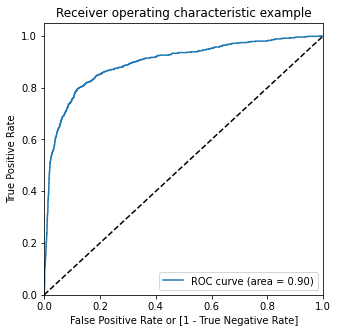

In [119]:
# ROC curve for the test dataset

# Defining the variables to plot the curve
fpr, tpr, thresholds = roc_curve(y_pred_final.churn_prob,y_pred_final.Churn, drop_intermediate = False )
# Plotting the curve for the obtained metrics
draw_roc(y_pred_final.churn_prob,y_pred_final.Churn)

- The AUC score for train dataset is 0.91 and the test dataset is 0.90
- This model can be considered as a good model

## PCA

In [120]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, test_size=0.2, random_state=42)

In [121]:
X_train.shape

(24000, 47)

In [122]:
pca = PCA(random_state=42)

In [123]:
pca.fit(X_train)

PCA(random_state=42)

In [124]:
pca.n_features_

47

In [125]:
pca.components_

array([[ 5.37372404e-02,  6.36916049e-02,  6.64416887e-02, ...,
         2.90941797e-01,  2.80646408e-01, -3.32428962e-04],
       [ 1.08530687e-01,  1.33608423e-01,  1.34724793e-01, ...,
        -4.64552118e-01, -4.08318923e-01, -3.57494030e-04],
       [ 7.58585591e-02, -9.77534449e-03, -7.25705061e-02, ...,
        -8.68527543e-02, -2.72730833e-01, -6.00750080e-04],
       ...,
       [ 1.20755831e-07, -2.43603239e-07, -3.38343755e-06, ...,
        -6.43135294e-07, -6.01312347e-06, -2.44026183e-05],
       [ 1.46666837e-06,  1.04558611e-06, -9.34777757e-07, ...,
         4.52737734e-06, -4.68606340e-06, -2.71601990e-05],
       [ 3.17559209e-09, -4.18343545e-09,  3.93051407e-10, ...,
         3.81164706e-10, -2.55109940e-10, -1.36570647e-08]])

In [126]:
pca.explained_variance_ratio_

array([4.87331750e-01, 1.42254374e-01, 1.16205562e-01, 8.42278548e-02,
       6.39240361e-02, 2.40860668e-02, 1.98663585e-02, 1.81167394e-02,
       1.46726245e-02, 1.33562144e-02, 6.28952045e-03, 2.13197439e-03,
       1.82309454e-03, 1.54114282e-03, 1.49002702e-03, 1.09210826e-03,
       8.10381643e-04, 7.25131010e-04, 5.40444539e-05, 5.22195630e-07,
       1.16879145e-07, 9.66544519e-08, 7.55140912e-08, 2.93970566e-08,
       2.41582780e-08, 2.02813978e-08, 1.52976694e-08, 1.49082452e-08,
       1.09533820e-08, 1.01143502e-08, 7.96348315e-09, 6.95995882e-09,
       6.75044725e-09, 6.24452856e-09, 6.07002553e-09, 4.29164316e-09,
       4.01905646e-09, 3.57816485e-09, 3.26232587e-09, 3.12151714e-09,
       2.48217249e-09, 1.17292876e-09, 1.08103715e-09, 7.60575915e-10,
       4.13725933e-10, 2.92553480e-10, 1.16092677e-16])

In [127]:
var_cumu = np.cumsum(pca.explained_variance_ratio_)

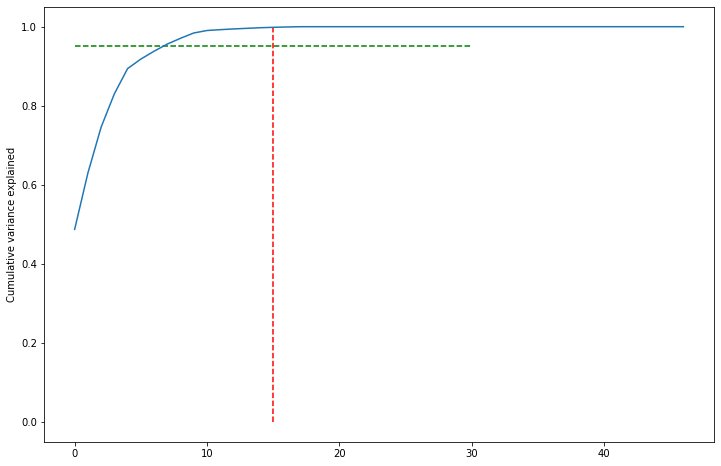

In [128]:
fig = plt.figure(figsize=[12,8])
plt.vlines(x=15, ymax=1, ymin=0, colors="r", linestyles="--")
plt.hlines(y=0.95, xmax=30, xmin=0, colors="g", linestyles="--")
plt.plot(var_cumu)
plt.ylabel("Cumulative variance explained")
plt.show()

Take the number of components same as the final in the LR model for IncrementalPCA

In [129]:
final_pca = IncrementalPCA(n_components=16)
pca_train_df = final_pca.fit_transform(X_train)
pca_train_df.shape

(24000, 16)

In [130]:
final_pca.feature_names_in_

array(['arpu_6', 'arpu_7', 'arpu_8', 'total_og_mou_6', 'total_og_mou_7',
       'total_og_mou_8', 'total_ic_mou_6', 'total_ic_mou_7',
       'total_ic_mou_8', 'last_day_rch_amt_6', 'last_day_rch_amt_7',
       'last_day_rch_amt_8', 'night_pck_user_6', 'night_pck_user_7',
       'night_pck_user_8', 'monthly_2g_6', 'monthly_2g_7', 'monthly_2g_8',
       'sachet_2g_6', 'sachet_2g_7', 'sachet_2g_8', 'monthly_3g_6',
       'monthly_3g_7', 'monthly_3g_8', 'sachet_3g_6', 'sachet_3g_7',
       'sachet_3g_8', 'total_rech_6', 'total_rech_7', 'total_rech_8',
       'total_rech_6_7', 'roam_any_6', 'roam_any_7', 'roam_any_8',
       'local_any_6', 'local_any_7', 'local_any_8', 'std_any_6',
       'std_any_7', 'std_any_8', 'spl_any_6', 'spl_any_7', 'spl_any_8',
       'data_used_6', 'data_used_7', 'data_used_8', 'term'], dtype=object)

In [131]:
correlation_matrix = np.corrcoef(pca_train_df.transpose())
correlation_matrix.shape

(16, 16)

In [132]:
pca_test_df = final_pca.transform(X_test)
pca_test_df.shape

(6001, 16)

Logistic regression for PCA

In [133]:
pca_lr = LogisticRegression()
pca_model = pca_lr.fit(pca_train_df, y_train)

Test Set Predictions

In [134]:
pca_test_pred = pca_model.predict_proba(pca_test_df)

In [135]:
from sklearn.metrics import roc_auc_score
round(roc_auc_score(y_test, pca_test_pred[:,1]),2)

0.87

In [136]:
pca_pred_prob_test = pca_model.predict(pca_test_df)
pca_confusion = confusion_matrix(y_test,pca_pred_prob_test)
print(pca_confusion)

[[5495   40]
 [ 398   68]]


In [137]:
TP = pca_confusion[1,1] # true positive 
TN = pca_confusion[0,0] # true negatives
FP = pca_confusion[0,1] # false positives
FN = pca_confusion[1,0] # false negatives

In [138]:
print("Accuracy:-",accuracy_score(y_test, pca_pred_prob_test))
print("Sensitivity:-",TP / float(TP+FN))
print("Specificity:-", TN / float(TN+FP))

Accuracy:- 0.9270121646392268
Sensitivity:- 0.1459227467811159
Specificity:- 0.992773261065944


## Summary

We have analysed the two model creation techniques Logistic Regression with RFE Logistic regression with PCA. Following is the summary of results

 

Logistic Regression
- Train Accuracy : ~91% . Test Accuracy : ~90%

Logistic regression with PCA
- Train Accuracy : ~92% . Test Accuracy : ~92% 




## Suggestions

The incoming calls of all categories are important factor in understanding the possibility of churn. Hence, the telecom operator should focus on incoming calls data should provide some kind of special offers to the customers whose incoming calls are turning lower.